# Pre-Processing and Classification of White Wine quality dataset

In [1]:
# Importing the needed libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as gobj
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data file and since the default seperator wasn't used, the actual seperator [;] was specified.

pd.read_csv('HW 3-winequality-white.csv', sep = "[;]")

"fixed acidity"  "volatile acidity"  "citric acid"  "residual sugar"  \
0                 7.0                0.27           0.36              20.7   
1                 6.3                0.30           0.34               1.6   
2                 8.1                0.28           0.40               6.9   
3                 7.2                0.23           0.32               8.5   
4                 7.2                0.23           0.32               8.5   
...               ...                 ...            ...               ...   
4893              6.2                0.21           0.29               1.6   
4894              6.6                0.32           0.36               8.0   
4895              6.5                0.24           0.19               1.2   
4896              5.5                0.29           0.30               1.1   
4897              6.0                0.21           0.38               0.8   

      "chlorides"  "free sulfur dioxide"  "total sulfur dioxide"  "density"  \
0           0.045                   45.0                   170.0    1.00100   
1           0.049                   14.0                   132.0    0.99400   
2           0.050                   30.0                    97.0    0.99510   
3           0.058                   47.0                   186.0    0.99560   
4           0.058                   47.0                   186.0    0.99560   
...           ...                    ...                     ...        ...   
4893        0.039                   24.0                    92.0    0.99114   
4894        0.047                   57.0                   168.0    0.99490   
4895        0.041                   30.0                   111.0    0.99254   
4896        0.022                   20.0                   110.0    0.98869   
4897        0.020                   22.0                    98.0    0.98941   

      "pH"  "sulphates"  "alcohol"  "quality"  
0     3.00         0.45        8.8          6  
1     3.30         0.49        9.5          6  
2     3.26         0.44       10.1          6  
3     3.19         0.40        9.9          6  
4     3.19         0.40        9.9          6  
...    ...          ...        ...        ...  
4893  3.27         0.50       11.2          6  
4894  3.15         0.46        9.6          5  
4895  2.99         0.46        9.4          6  
4896  3.34         0.38       12.8          7  
4897  3.26         0.32       11.8          6  

[4898 rows x 12 columns]

In [3]:
#Assigns a variable df to the data

df = pd.read_csv('HW 3-winequality-white.csv', sep = "[;]")

In [4]:
# Renames the columns of the dataset

df.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']

In [5]:
#Categorizing the wine quality into 4 labels (Low, Medium_Low, Medium_High and High)

df_Quality = pd.cut(df['Quality'], [0, 4, 5, 7, 10], labels = ["Low", "Medium-low", "Medium-high", "High"])

In [6]:
WW = df.drop(['Quality'], axis=1)
WW

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      Alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [7]:
# Joins the (wine quality category), with the dataset 
White_Wine = pd.concat([WW, df_Quality], axis = 1)

# Renames the (wine quality category) to 'Wine Quality'
White_Wine.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Wine_Quality']

In [10]:
White_Wine = White_Wine.sort_values('Wine_Quality')
White_Wine.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
1484            7.5             0.320         0.24             4.6      0.053   
2246            6.4             0.340         0.20            14.9      0.060   
690             6.9             0.200         0.34             1.9      0.043   
4804            6.0             0.350         0.46             0.9      0.033   
147             6.4             0.595         0.14             5.2      0.058   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
1484                  8.0                 134.0  0.99580  3.14       0.50   
2246                 37.0                 162.0  0.99830  3.13       0.45   
690                  25.0                 136.0  0.99350  3.31       0.60   
4804                  9.0                  65.0  0.98934  3.24       0.35   
147                  15.0                  97.0  0.99510  3.38       0.36   

      Alcohol Wine_Quality  
1484      9.1          Low  
2246      9.0          Low  
690      10.1          Low  
4804     12.1          Low  
147       9.0          Low

In [11]:
#Gets the Low Quality Wine Category
Low = White_Wine.groupby('Wine_Quality').get_group('Low')
Low

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
1484            7.5             0.320         0.24            4.60      0.053   
2246            6.4             0.340         0.20           14.90      0.060   
690             6.9             0.200         0.34            1.90      0.043   
4804            6.0             0.350         0.46            0.90      0.033   
147             6.4             0.595         0.14            5.20      0.058   
...             ...               ...          ...             ...        ...   
1951            9.9             1.005         0.46            1.40      0.046   
3021            6.8             0.270         0.29            4.60      0.046   
3571            5.9             0.655         0.00            5.60      0.033   
1029            6.3             0.600         0.44           11.00      0.050   
3559            7.5             0.340         0.24            3.85      0.031   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
1484                  8.0                 134.0  0.99580  3.14       0.50   
2246                 37.0                 162.0  0.99830  3.13       0.45   
690                  25.0                 136.0  0.99350  3.31       0.60   
4804                  9.0                  65.0  0.98934  3.24       0.35   
147                  15.0                  97.0  0.99510  3.38       0.36   
...                   ...                   ...      ...   ...        ...   
1951                 34.0                 185.0  0.99660  3.02       0.49   
3021                  6.0                  88.0  0.99458  3.34       0.48   
3571                  8.0                  31.0  0.99360  3.32       0.51   
1029                 50.0                 245.0  0.99720  3.19       0.57   
3559                  5.0                  34.0  0.99098  3.01       0.36   

      Alcohol Wine_Quality  
1484      9.1          Low  
2246      9.0          Low  
690      10.1          Low  
4804     12.1          Low  
147       9.0          Low  
...       ...          ...  
1951     10.2          Low  
3021     10.6          Low  
3571     10.5          Low  
1029      9.3          Low  
3559     11.8          Low  

[183 rows x 12 columns]

In [12]:
#Gets the Medium_Low Wine Category
Medium_low = White_Wine.groupby('Wine_Quality').get_group('Medium-low')
Medium_low

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
3766            6.9              0.40         0.17           12.90      0.033   
3791            6.5              0.26         0.50            8.00      0.051   
1630            6.9              0.25         0.24            1.80      0.053   
3816            6.8              0.41         0.30            8.80      0.045   
3814            7.4              0.34         0.28           12.10      0.049   
...             ...               ...          ...             ...        ...   
14              8.3              0.42         0.62           19.25      0.040   
4293            7.2              0.21         0.36           15.70      0.045   
4291            7.2              0.21         0.36           15.70      0.045   
12              7.9              0.18         0.37            1.20      0.040   
925             6.3              0.27         0.23            2.90      0.047   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
3766                 59.0                 186.0  0.99754  3.08       0.49   
3791                 46.0                 197.0  0.99536  3.18       0.47   
1630                  6.0                 121.0  0.99300  3.23       0.70   
3816                 28.0                 131.0  0.99530  3.12       0.59   
3814                 31.0                 149.0  0.99677  3.22       0.49   
...                   ...                   ...      ...   ...        ...   
14                   41.0                 172.0  1.00020  2.98       0.67   
4293                 68.0                 183.0  0.99922  3.25       0.76   
4291                 68.0                 183.0  0.99922  3.25       0.76   
12                   16.0                  75.0  0.99200  3.18       0.63   
925                  13.0                 100.0  0.99360  3.28       0.43   

      Alcohol Wine_Quality  
3766      9.4   Medium-low  
3791      9.5   Medium-low  
1630     11.4   Medium-low  
3816      9.9   Medium-low  
3814     10.3   Medium-low  
...       ...          ...  
14        9.7   Medium-low  
4293      9.4   Medium-low  
4291      9.4   Medium-low  
12       10.8   Medium-low  
925       9.8   Medium-low  

[1457 rows x 12 columns]

In [13]:
# Gets the Medium_High Quality Wine Group
Medium_high = White_Wine.groupby('Wine_Quality').get_group('Medium-high')
Medium_high

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
3447            6.0              0.17         0.29            9.70      0.044   
4631            6.6              0.21         0.39            2.30      0.041   
3362            7.2              0.22         0.28            7.20      0.060   
4689            6.7              0.16         0.32           12.50      0.035   
3353            6.5              0.43         0.28           11.25      0.032   
...             ...               ...          ...             ...        ...   
1988            8.0              0.22         0.32           10.40      0.043   
1986            7.6              0.16         0.41            1.90      0.047   
1985            8.1              0.19         0.58           16.65      0.049   
1560            7.8              0.30         0.74            1.80      0.033   
1557            7.9              0.18         0.49            5.20      0.051   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
3447                 33.0                  98.0  0.99536  3.12       0.36   
4631                 31.0                 102.0  0.99221  3.22       0.58   
3362                 41.0                 132.0  0.99350  3.08       0.59   
4689                 18.0                 156.0  0.99666  2.88       0.36   
3353                 31.0                  87.0  0.99220  3.02       0.38   
...                   ...                   ...      ...   ...        ...   
1988                 63.0                 201.0  0.99700  3.11       0.53   
1986                 27.0                 151.0  0.99370  3.20       0.53   
1985                 48.0                 181.0  1.00060  3.20       0.62   
1560                 33.0                 156.0  0.99100  3.29       0.52   
1557                 36.0                 157.0  0.99530  3.18       0.48   

      Alcohol Wine_Quality  
3447      9.2  Medium-high  
4631     10.9  Medium-high  
3362     11.3  Medium-high  
4689      9.0  Medium-high  
3353     12.4  Medium-high  
...       ...          ...  
1988      9.5  Medium-high  
1986     10.1  Medium-high  
1985      9.1  Medium-high  
1560     12.8  Medium-high  
1557     10.6  Medium-high  

[3078 rows x 12 columns]

In [14]:
# Gets High Quality wine Category 
High = White_Wine.groupby('Wine_Quality').get_group('High')
High

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
22              6.8              0.26         0.42            1.70      0.049   
2945            4.9              0.33         0.31            1.20      0.016   
2803            5.5              0.15         0.32           14.00      0.031   
20              6.2              0.66         0.48            1.20      0.029   
3029            7.1              0.47         0.29           14.80      0.024   
...             ...               ...          ...             ...        ...   
1218            7.2              0.26         0.44            7.10      0.027   
1219            8.2              0.37         0.36            1.00      0.034   
1797            6.9              0.25         0.27            9.05      0.039   
3252            7.1              0.26         0.37            5.50      0.025   
3445            6.6              0.15         0.32            6.00      0.033   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
22                   41.0                 122.0  0.99300  3.47       0.48   
2945                 39.0                 150.0  0.98713  3.33       0.59   
2803                 16.0                  99.0  0.99437  3.26       0.38   
20                   29.0                  75.0  0.98920  3.33       0.39   
3029                 22.0                 142.0  0.99518  3.12       0.48   
...                   ...                   ...      ...   ...        ...   
1218                 25.0                 126.0  0.99300  3.02       0.34   
1219                 17.0                  93.0  0.99060  3.04       0.32   
1797                 37.0                 128.0  0.99360  3.27       0.34   
3252                 31.0                 105.0  0.99082  3.06       0.33   
3445                 59.0                 128.0  0.99192  3.19       0.71   

      Alcohol Wine_Quality  
22       10.5         High  
2945     14.0         High  
2803     11.5         High  
20       12.8         High  
3029     12.0         High  
...       ...          ...  
1218     11.1         High  
1219     11.7         High  
1797     11.3         High  
3252     12.6         High  
3445     12.1         High  

[180 rows x 12 columns]

In [15]:
#Correlation Matrix, to check Correlation between Variables
corr = WW.corr()
corr

Fixed Acidity  Volatile Acidity  Citric Acid  \
Fixed Acidity              1.000000         -0.022697     0.289181   
Volatile Acidity          -0.022697          1.000000    -0.149472   
Citric Acid                0.289181         -0.149472     1.000000   
Residual Sugar             0.089021          0.064286     0.094212   
Chlorides                  0.023086          0.070512     0.114364   
Free Sulfur Dioxide       -0.049396         -0.097012     0.094077   
Total Sulfur Dioxide       0.091070          0.089261     0.121131   
Density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
Sulphates                 -0.017143         -0.035728     0.062331   
Alcohol                   -0.120881          0.067718    -0.075729   

                      Residual Sugar  Chlorides  Free Sulfur Dioxide  \
Fixed Acidity               0.089021   0.023086            -0.049396   
Volatile Acidity            0.064286   0.070512            -0.097012   
Citric Acid                 0.094212   0.114364             0.094077   
Residual Sugar              1.000000   0.088685             0.299098   
Chlorides                   0.088685   1.000000             0.101392   
Free Sulfur Dioxide         0.299098   0.101392             1.000000   
Total Sulfur Dioxide        0.401439   0.198910             0.615501   
Density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
Sulphates                  -0.026664   0.016763             0.059217   
Alcohol                    -0.450631  -0.360189            -0.250104   

                      Total Sulfur Dioxide   Density        pH  Sulphates  \
Fixed Acidity                     0.091070  0.265331 -0.425858  -0.017143   
Volatile Acidity                  0.089261  0.027114 -0.031915  -0.035728   
Citric Acid                       0.121131  0.149503 -0.163748   0.062331   
Residual Sugar                    0.401439  0.838966 -0.194133  -0.026664   
Chlorides                         0.198910  0.257211 -0.090439   0.016763   
Free Sulfur Dioxide               0.615501  0.294210 -0.000618   0.059217   
Total Sulfur Dioxide              1.000000  0.529881  0.002321   0.134562   
Density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
Sulphates                         0.134562  0.074493  0.155951   1.000000   
Alcohol                          -0.448892 -0.780138  0.121432  -0.017433   

                       Alcohol  
Fixed Acidity        -0.120881  
Volatile Acidity      0.067718  
Citric Acid          -0.075729  
Residual Sugar       -0.450631  
Chlorides            -0.360189  
Free Sulfur Dioxide  -0.250104  
Total Sulfur Dioxide -0.448892  
Density              -0.780138  
pH                    0.121432  
Sulphates            -0.017433  
Alcohol               1.000000

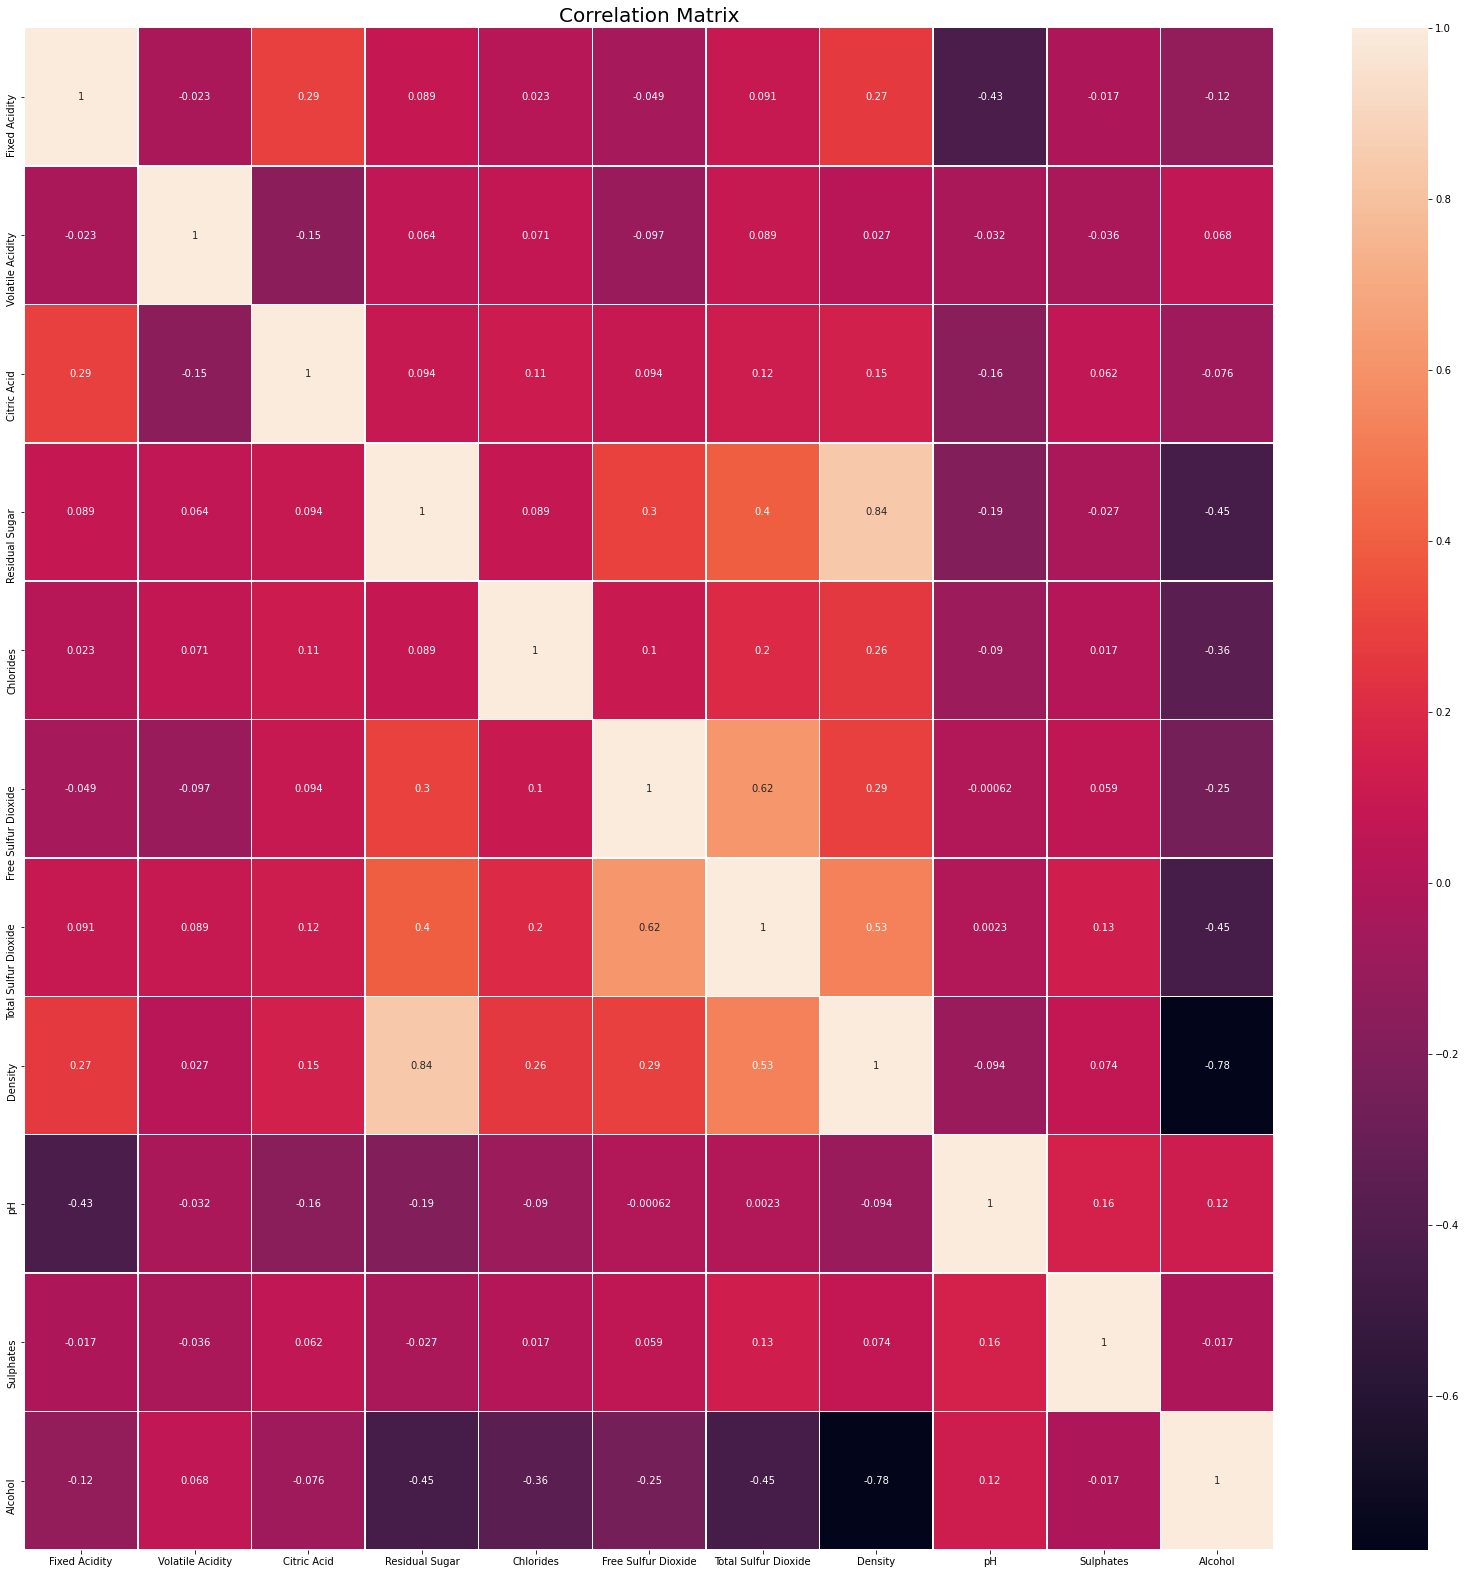

In [16]:
plt.figure(figsize=(28,28))
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
H =sns.heatmap(corr, annot=True,linewidths=.5)

# High Correlation between Density and (Residual Sugar and Alcohol)

# Gaussian naive Bayesian classifier, with training and testing metrics.

In [17]:
#Importing the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [20]:
#Splitting the dataset into Testing and Training sets. 80% Training data and 20% Testing data

X_train, X_test, Y_train, Y_test = train_test_split(WW, df_Quality, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


In [21]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [22]:
Y_pred = gnb.predict(X_test)

In [23]:
#Accuracy Score

acc = accuracy_score(Y_test, Y_pred)
print(f'Accuracy Score = {acc}')


Accuracy Score = 0.6428571428571429


In [25]:
#Classification Report

cr = classification_report(Y_test, Y_pred)
print('\nClassification Report Table:' f'\n{cr}')



Classification Report Table:
              precision    recall  f1-score   support

        High       0.08      0.03      0.04        35
         Low       0.23      0.30      0.26        30
 Medium-high       0.74      0.75      0.74       624
  Medium-low       0.52      0.53      0.52       291

    accuracy                           0.64       980
   macro avg       0.39      0.40      0.39       980
weighted avg       0.64      0.64      0.64       980



In [26]:
# Precision using 'micro' average

precision = precision_score(Y_test, Y_pred, average = 'micro')
print(f'Precision = {precision}')


Precision = 0.6428571428571429


Confusion matrix, without normalization
[[  1   1  31   2]
 [  0   9  12   9]
 [ 12  12 466 134]
 [  0  18 119 154]]
Normalized confusion matrix
[[0.02857143 0.02857143 0.88571429 0.05714286]
 [0.         0.3        0.4        0.3       ]
 [0.01923077 0.01923077 0.74679487 0.21474359]
 [0.         0.06185567 0.40893471 0.52920962]]


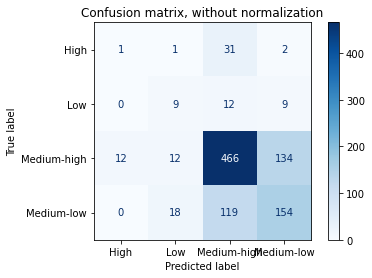

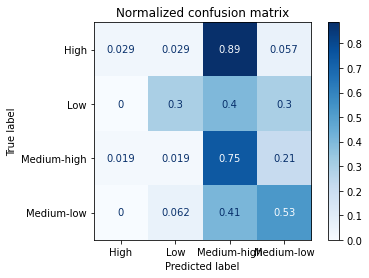

In [27]:
#Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVM classifier including training and testing metrics.

In [28]:
# SVM classifier

from sklearn import svm

In [29]:
classifier = svm.SVC()
classifier.fit(X_train, Y_train)

SVC()

In [30]:
Y_Predict = classifier.predict(X_test)

In [31]:
#Accuracy Score
acc = accuracy_score(Y_test, Y_Predict)
print(f'Accuracy Score = {acc}')

Accuracy Score = 0.636734693877551


In [32]:
#Classification Report

cr = classification_report(Y_test, Y_Predict)
print('\nClassification Report Table:' f'\n{cr}')


Classification Report Table:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        35
         Low       0.00      0.00      0.00        30
 Medium-high       0.64      1.00      0.78       624
  Medium-low       0.00      0.00      0.00       291

    accuracy                           0.64       980
   macro avg       0.16      0.25      0.19       980
weighted avg       0.41      0.64      0.50       980



In [33]:
#Metrics using 'Micro' average
precision_recall_fscore_support(Y_test, Y_Predict, average='micro')

(0.636734693877551, 0.636734693877551, 0.636734693877551, None)

Confusion matrix, without normalization
[[  0   0  35   0]
 [  0   0  30   0]
 [  0   0 624   0]
 [  0   0 291   0]]
Normalized confusion matrix
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


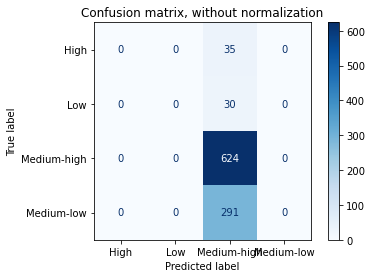

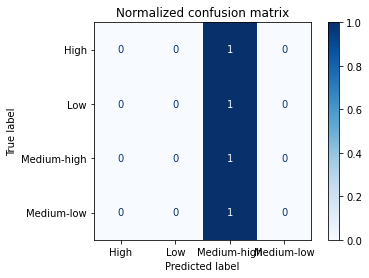

In [34]:
# Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Cross Validation

In [35]:
#importing necessary libraries

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [36]:
# Understanding the impact of varying Margin size (C) on the train_score 

C = []
Y = []

for i in range (10, 501, 10):
    classifier = svm.SVC(C=i/100)
    classifier.fit(X_train, Y_train)
    
    scores = cross_validate(classifier, X_train, Y_train, scoring = "f1_micro", return_train_score=True)
    Train_Score = scores['train_score']
    Train_Score.mean()
    
    
    
    C.append(i/100)
    Y.append(Train_Score.mean())

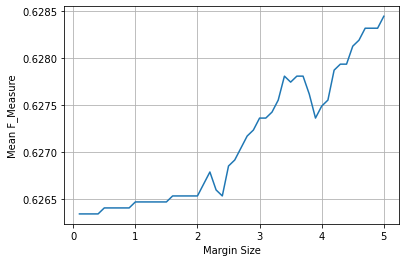

In [37]:
# Plot of average F-Measure against Varying Margin size (C)

fig, ax = plt.subplots()
ax.plot(C, Y)

ax.set(xlabel='Margin Size', ylabel='Mean F_Measure')
ax.grid()

fig.savefig("test.png")
plt.show()

# The Average F_Measure increased as trhe Margin Size increased

# Decision tree classifier with training and testing metrics

In [38]:
# Importing necessary Decision Tree libraries

from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data
import pydotplus as pdp
from sklearn.metrics import classification_report

In [39]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
YPred = d_tree.predict(X_test)

In [41]:
#Accuracy Score
acc = accuracy_score(Y_test, YPred)
print(f' Accuracy Score = {acc}')

 Accuracy Score = 0.7397959183673469


In [42]:
#Classification Report
cr = classification_report(Y_test, YPred)
print('\nClassification Report Table:' f'\n{cr}')


Classification Report Table:
              precision    recall  f1-score   support

        High       0.41      0.46      0.43        35
         Low       0.29      0.33      0.31        30
 Medium-high       0.82      0.82      0.82       624
  Medium-low       0.67      0.65      0.66       291

    accuracy                           0.74       980
   macro avg       0.55      0.56      0.55       980
weighted avg       0.74      0.74      0.74       980



In [43]:
# Metrics using 'micro' average

precision_recall_fscore_support(Y_test, YPred, average='micro')

(0.7397959183673469, 0.7397959183673469, 0.7397959183673468, None)

Confusion matrix, without normalization
[[ 16   0  19   0]
 [  0  10   7  13]
 [ 21  14 510  79]
 [  2  11  89 189]]
Normalized confusion matrix
[[0.45714286 0.         0.54285714 0.        ]
 [0.         0.33333333 0.23333333 0.43333333]
 [0.03365385 0.0224359  0.81730769 0.12660256]
 [0.00687285 0.03780069 0.30584192 0.64948454]]


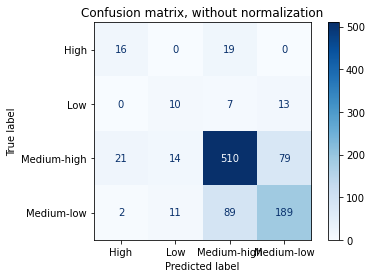

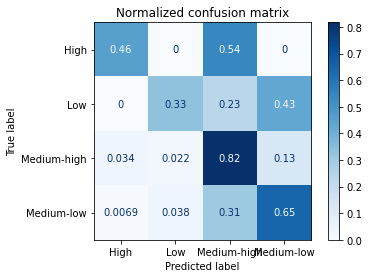

In [44]:
#Confusion Matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(d_tree, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [45]:
#Decision Tree using different parameters

n = [] # Parameter changes from 2, ... to 10
Y1 = [] # Mean Train_Score
Y2 = [] # Mean Test_Score


for i in range (2, 11, 1):
    D_tree = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = i, max_features = i)
    D_tree.fit(X_train, Y_train)
    
    
    scores = cross_validate(D_tree, X_train, Y_train, scoring = "f1_micro", cv = 5, return_train_score=True) # Default CV = 5
    Train_Score = scores['train_score']
    Train_Score.mean()
    
    Test_Score = scores['test_score']
    Test_Score.mean()
    
    
    n.append(i)
    Y1.append(Train_Score.mean())
    Y2.append(Test_Score.mean())

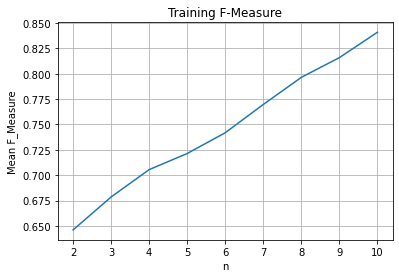

In [46]:
#Training F-Measure Plot

fig, ax = plt.subplots()
ax.plot(n, Y1)

ax.set(xlabel='n', ylabel='Mean F_Measure', title = "Training F-Measure")

ax.grid()

fig.savefig("test.png")
plt.show()


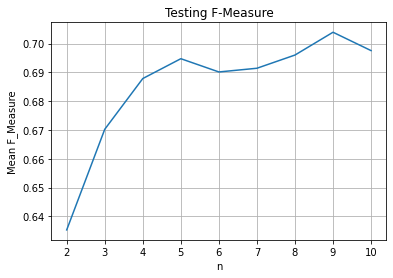

In [48]:
#Testing F-Measure Plot

fig, ax = plt.subplots()
ax.plot(n, Y2)

ax.set(xlabel='n', ylabel='Mean F_Measure', title = "Testing F-Measure")
ax.grid()

fig.savefig("test.png")
plt.show()


# It can be seen that for the changing parameters, the training dataset provided better F-Measure than the testing dataset, this indicates Overfitting because it means the model perfoms better on the training dataset than the testing dataset. 

[Text(140.59268276561073, 213.55714285714285, 'X[10] <= 10.017\ngini = 0.516\nsamples = 3918\nvalue = [145, 153, 2454, 1166]'),
 Text(60.26926467651757, 205.79142857142858, 'X[1] <= 0.237\ngini = 0.552\nsamples = 1676\nvalue = [19, 74, 773, 810]'),
 Text(23.09867868553172, 198.0257142857143, 'X[3] <= 6.45\ngini = 0.449\nsamples = 555\nvalue = [18, 10, 387, 140]'),
 Text(12.705896850753081, 190.26, 'X[5] <= 26.5\ngini = 0.506\nsamples = 203\nvalue = [1, 7, 123, 72]'),
 Text(6.234523048836148, 182.4942857142857, 'X[6] <= 99.5\ngini = 0.534\nsamples = 81\nvalue = [0, 3, 37, 41]'),
 Text(3.178384299406664, 174.72857142857143, 'X[4] <= 0.031\ngini = 0.489\nsamples = 37\nvalue = [0, 1, 23, 13]'),
 Text(2.689402099497946, 166.96285714285713, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4]'),
 Text(3.6673664993153814, 166.96285714285713, 'X[10] <= 9.75\ngini = 0.439\nsamples = 33\nvalue = [0, 1, 23, 9]'),
 Text(2.4449109995435876, 159.19714285714286, 'X[5] <= 22.0\ngini = 0.56\nsamples = 15\nva

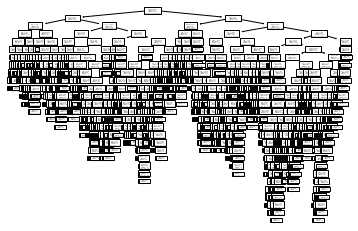

In [49]:
# Decision Tree

tree.plot_tree(d_tree) 

### Decision Tree using Graphviz

In [50]:
# columns name of the dataset
WW.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']

In [51]:
dot_data = StringIO()
export_graphviz(d_tree, out_file=dot_data, feature_names=WW.columns,
filled=True, rounded=True,
special_characters=True)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.720534 to fit

